In [8]:
# Cell 1: Library Imports and Environment Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from pathlib import Path
from datetime import datetime

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 10

# Define paths
BASE_DIR = Path('/Users/apeltop/project/personal/jodal-insert-test')
MIGRATION_OUTPUTS_DIR = BASE_DIR / 'migration_outputs'

print("✅ Libraries loaded successfully!")
print(f"📂 Base directory: {BASE_DIR}")
print(f"📂 Migration outputs: {MIGRATION_OUTPUTS_DIR}")

✅ Libraries loaded successfully!
📂 Base directory: /Users/apeltop/project/personal/jodal-insert-test
📂 Migration outputs: /Users/apeltop/project/personal/jodal-insert-test/migration_outputs


In [9]:
# Cell 2: Data Loading Functions

def load_test_index():
    """Load test runs index as DataFrame"""
    index_path = MIGRATION_OUTPUTS_DIR / 'test_runs_index.json'
    with open(index_path, 'r') as f:
        data = json.load(f)
    df = pd.DataFrame(data['test_runs'])
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    return df

def load_test_results(test_id):
    """Load migration results for a specific test"""
    results_path = MIGRATION_OUTPUTS_DIR / 'runs' / test_id / 'migration_results.json'
    with open(results_path, 'r') as f:
        return json.load(f)

def load_test_stats(test_id):
    """Load migration stats (batch-level details) as DataFrame"""
    stats_path = MIGRATION_OUTPUTS_DIR / 'runs' / test_id / 'migration_stats.json'
    with open(stats_path, 'r') as f:
        data = json.load(f)
    df = pd.DataFrame(data['batches'])
    df['start_time'] = pd.to_datetime(df['start_time'])
    df['end_time'] = pd.to_datetime(df['end_time'])
    return df

# Test the functions
print("✅ Data loading functions defined!")
print("\nLoading test index...")
test_df = load_test_index()
print(f"📊 Found {len(test_df)} test runs")
print(f"📊 Date range: {test_df['timestamp'].min()} to {test_df['timestamp'].max()}")
test_df.head()

✅ Data loading functions defined!

Loading test index...
📊 Found 38 test runs
📊 Date range: 2025-10-16 15:52:15.509683 to 2025-10-20 16:34:23.063743


,test_id,timestamp,cloud_provider,instance_type,batch_size,num_connections,status,output_dir,total_records,total_duration_seconds,average_records_per_second,error_message
0,20251016_155215_GCP_db-1-0_6_b10_c1,2025-10-16 15:52:15.509683,GCP,db-1-0_6,10,1,completed,runs/20251016_155215_GCP_db-1-0_6_b10_c1,100000,2256.689159,44.312705,None
1,20251016_163135_GCP_db-1-0_6_b100_c1,2025-10-16 16:31:35.756880,GCP,db-1-0_6,100,1,completed,runs/20251016_163135_GCP_db-1-0_6_b100_c1,100000,1172.365466,85.297634,None
2,20251016_165322_GCP_db-1-0_6_b500_c1,2025-10-16 16:53:22.711759,GCP,db-1-0_6,500,1,completed,runs/20251016_165322_GCP_db-1-0_6_b500_c1,100000,1864.950631,53.620722,None
3,20251017_134218_GCP_db-1-0_6_b10_c10,2025-10-17 13:42:18.082753,GCP,db-1-0_6,10,10,completed,runs/20251017_134218_GCP_db-1-0_6_b10_c10,100000,1756.284256,56.938391,None
4,20251017_141510_GCP_db-1-0_6_b100_c10,2025-10-17 14:15:10.969153,GCP,db-1-0_6,100,10,completed,runs/20251017_141510_GCP_db-1-0_6_b100_c10,100000,909.681011,109.928644,None


In [10]:
# Cell 3: Test Overview Analysis

print("=" * 80)
print("📊 TEST RUNS OVERVIEW")
print("=" * 80)

# Basic statistics
print(f"\n✅ Total test runs: {len(test_df)}")
print(f"✅ Completed: {len(test_df[test_df['status'] == 'completed'])}")
print(f"⚠️  Failed/Other: {len(test_df[test_df['status'] != 'completed'])}")

# Group by configuration
print("\n📊 Tests by Instance Type:")
print(test_df['instance_type'].value_counts())

print("\n📊 Tests by Batch Size:")
print(test_df['batch_size'].value_counts().sort_index())

print("\n📊 Tests by Connection Count:")
print(test_df['num_connections'].value_counts().sort_index())

# Performance statistics
completed_df = test_df[test_df['status'] == 'completed'].copy()
print("\n⚡ Performance Statistics (Completed Tests Only):")
print(f"  - Average throughput: {completed_df['average_records_per_second'].mean():.2f} records/sec")
print(f"  - Max throughput: {completed_df['average_records_per_second'].max():.2f} records/sec")
print(f"  - Min throughput: {completed_df['average_records_per_second'].min():.2f} records/sec")
print(f"  - Median throughput: {completed_df['average_records_per_second'].median():.2f} records/sec")

# Top 5 best performing tests
print("\n🏆 Top 5 Best Performing Tests:")
top5 = completed_df.nlargest(5, 'average_records_per_second')[
    ['test_id', 'instance_type', 'batch_size', 'num_connections', 'average_records_per_second']
]
print(top5.to_string(index=False))

📊 TEST RUNS OVERVIEW

✅ Total test runs: 38
✅ Completed: 38
⚠️  Failed/Other: 0

📊 Tests by Instance Type:
instance_type
db-2-3_75    21
db-1-1_7     12
db-1-0_6      5
Name: count, dtype: int64

📊 Tests by Batch Size:
batch_size
10       6
100     12
500     10
1000     9
2000     1
Name: count, dtype: int64

📊 Tests by Connection Count:
num_connections
1     13
10    10
20     5
30     4
50     3
80     3
Name: count, dtype: int64

⚡ Performance Statistics (Completed Tests Only):
  - Average throughput: 530.06 records/sec
  - Max throughput: 1327.54 records/sec
  - Min throughput: 44.31 records/sec
  - Median throughput: 427.21 records/sec

🏆 Top 5 Best Performing Tests:
                                test_id instance_type  batch_size  num_connections  average_records_per_second
 20251020_140502_GCP_db-2-3_75_b500_c30     db-2-3_75         500               30                 1327.535767
 20251020_144230_GCP_db-2-3_75_b500_c50     db-2-3_75         500               50              

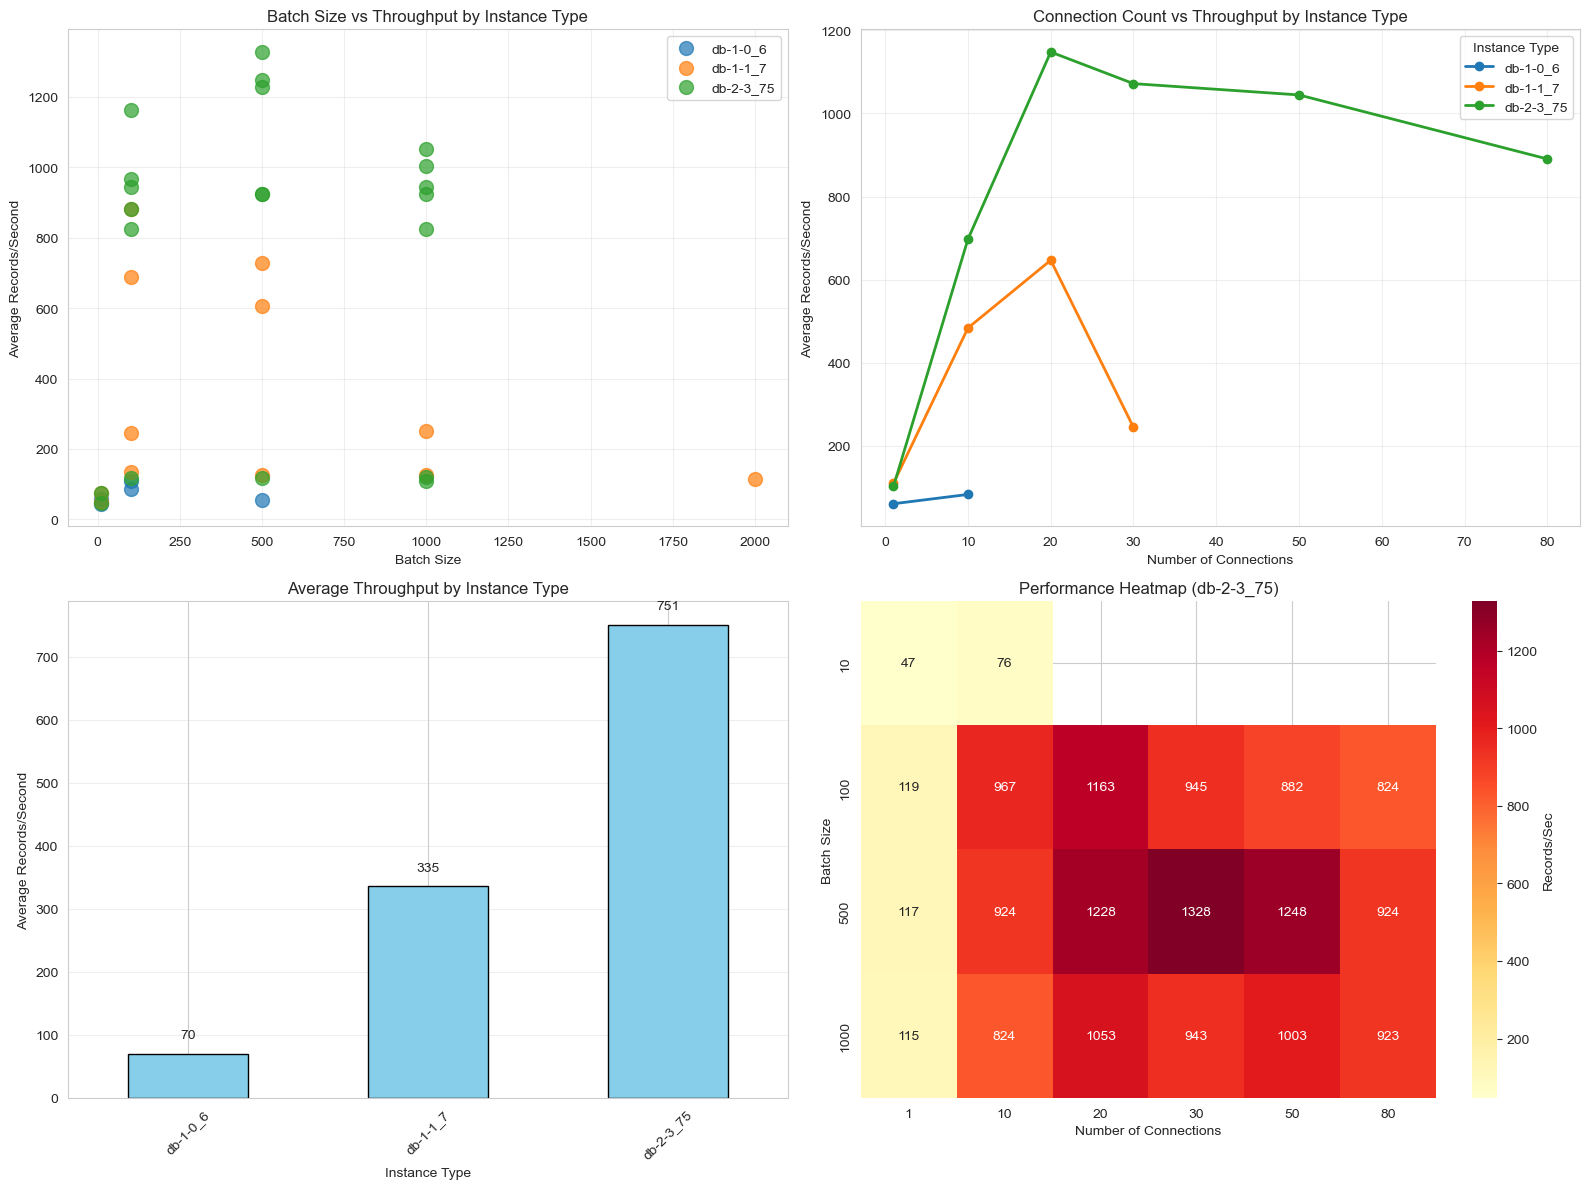


📊 Visualizations generated for 38 completed test runs


In [11]:
# Cell 4: Performance Comparison Analysis

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Batch Size vs Throughput (Scatter)
ax1 = axes[0, 0]
for instance in completed_df['instance_type'].unique():
    data = completed_df[completed_df['instance_type'] == instance]
    ax1.scatter(data['batch_size'], data['average_records_per_second'], 
                label=instance, alpha=0.7, s=100)
ax1.set_xlabel('Batch Size')
ax1.set_ylabel('Average Records/Second')
ax1.set_title('Batch Size vs Throughput by Instance Type')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Connection Count vs Throughput (Line)
ax2 = axes[0, 1]
pivot_data = completed_df.pivot_table(
    values='average_records_per_second',
    index='num_connections',
    columns='instance_type',
    aggfunc='mean'
)
pivot_data.plot(ax=ax2, marker='o', linewidth=2)
ax2.set_xlabel('Number of Connections')
ax2.set_ylabel('Average Records/Second')
ax2.set_title('Connection Count vs Throughput by Instance Type')
ax2.legend(title='Instance Type')
ax2.grid(True, alpha=0.3)

# Plot 3: Instance Type Comparison (Bar)
ax3 = axes[1, 0]
instance_perf = completed_df.groupby('instance_type')['average_records_per_second'].agg(['mean', 'max', 'min'])
instance_perf['mean'].plot(kind='bar', ax=ax3, color='skyblue', edgecolor='black')
ax3.set_xlabel('Instance Type')
ax3.set_ylabel('Average Records/Second')
ax3.set_title('Average Throughput by Instance Type')
ax3.tick_params(axis='x', rotation=45)
ax3.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for i, v in enumerate(instance_perf['mean']):
    ax3.text(i, v + 20, f'{v:.0f}', ha='center', va='bottom', fontsize=10)

# Plot 4: Heatmap - Batch Size vs Connections
ax4 = axes[1, 1]
# Filter for most common instance type for cleaner heatmap
most_common_instance = completed_df['instance_type'].value_counts().index[0]
heatmap_data = completed_df[completed_df['instance_type'] == most_common_instance].pivot_table(
    values='average_records_per_second',
    index='batch_size',
    columns='num_connections',
    aggfunc='mean'
)
sns.heatmap(heatmap_data, annot=True, fmt='.0f', cmap='YlOrRd', ax=ax4, cbar_kws={'label': 'Records/Sec'})
ax4.set_xlabel('Number of Connections')
ax4.set_ylabel('Batch Size')
ax4.set_title(f'Performance Heatmap ({most_common_instance})')

plt.tight_layout()
plt.show()

print(f"\n📊 Visualizations generated for {len(completed_df)} completed test runs")

📊 Analyzing Time Breakdown for: 20251020_140502_GCP_db-2-3_75_b500_c30
   Instance: db-2-3_75, Batch: 500, Connections: 30
   Throughput: 1327.54 records/sec

⏱️  Time Breakdown:
  - Data Preparation Time: 0.07%
  - Query Execution Time: 97.33%
  - Commit Time: 0.48%
  - Overhead Time: 2.12%


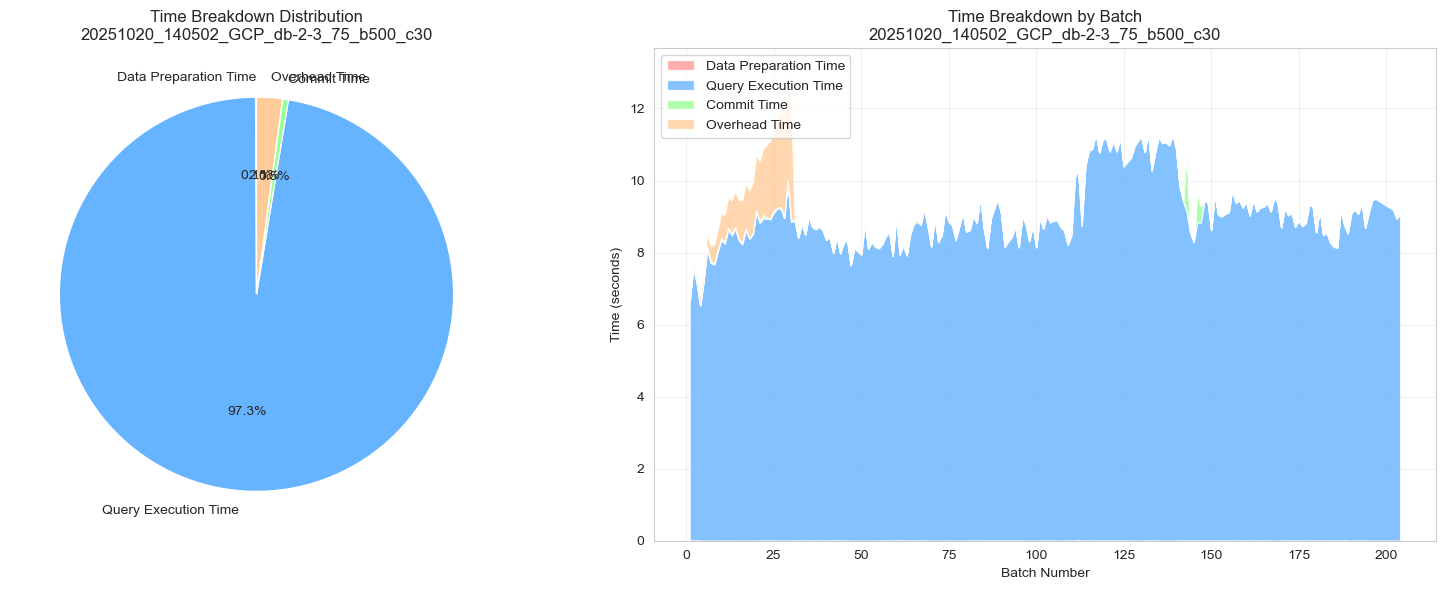

In [12]:
# Cell 5: Time Breakdown Analysis (Select a test to analyze)

# Select the best performing test for detailed analysis
best_test = completed_df.nlargest(1, 'average_records_per_second').iloc[0]
test_id = best_test['test_id']

print(f"📊 Analyzing Time Breakdown for: {test_id}")
print(f"   Instance: {best_test['instance_type']}, Batch: {best_test['batch_size']}, Connections: {best_test['num_connections']}")
print(f"   Throughput: {best_test['average_records_per_second']:.2f} records/sec\n")

# Load batch-level stats
stats_df = load_test_stats(test_id)

# Calculate time breakdown percentages
time_components = ['data_preparation_time', 'query_execution_time', 'commit_time', 'overhead_time']
time_totals = stats_df[time_components].sum()
time_percentages = (time_totals / time_totals.sum() * 100).round(2)

print("⏱️  Time Breakdown:")
for component, percentage in time_percentages.items():
    print(f"  - {component.replace('_', ' ').title()}: {percentage:.2f}%")

# Create visualizations
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Pie chart of time breakdown
ax1 = axes[0]
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
ax1.pie(time_totals, labels=[c.replace('_', ' ').title() for c in time_components], 
        autopct='%1.1f%%', colors=colors, startangle=90)
ax1.set_title(f'Time Breakdown Distribution\n{test_id}')

# Plot 2: Stacked area chart showing time breakdown over batches
ax2 = axes[1]
stats_df_sorted = stats_df.sort_values('batch_number')
ax2.stackplot(stats_df_sorted['batch_number'], 
              stats_df_sorted['data_preparation_time'],
              stats_df_sorted['query_execution_time'],
              stats_df_sorted['commit_time'],
              stats_df_sorted['overhead_time'],
              labels=[c.replace('_', ' ').title() for c in time_components],
              colors=colors,
              alpha=0.8)
ax2.set_xlabel('Batch Number')
ax2.set_ylabel('Time (seconds)')
ax2.set_title(f'Time Breakdown by Batch\n{test_id}')
ax2.legend(loc='upper left')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

📊 Batch-Level Trends for: 20251020_140502_GCP_db-2-3_75_b500_c30



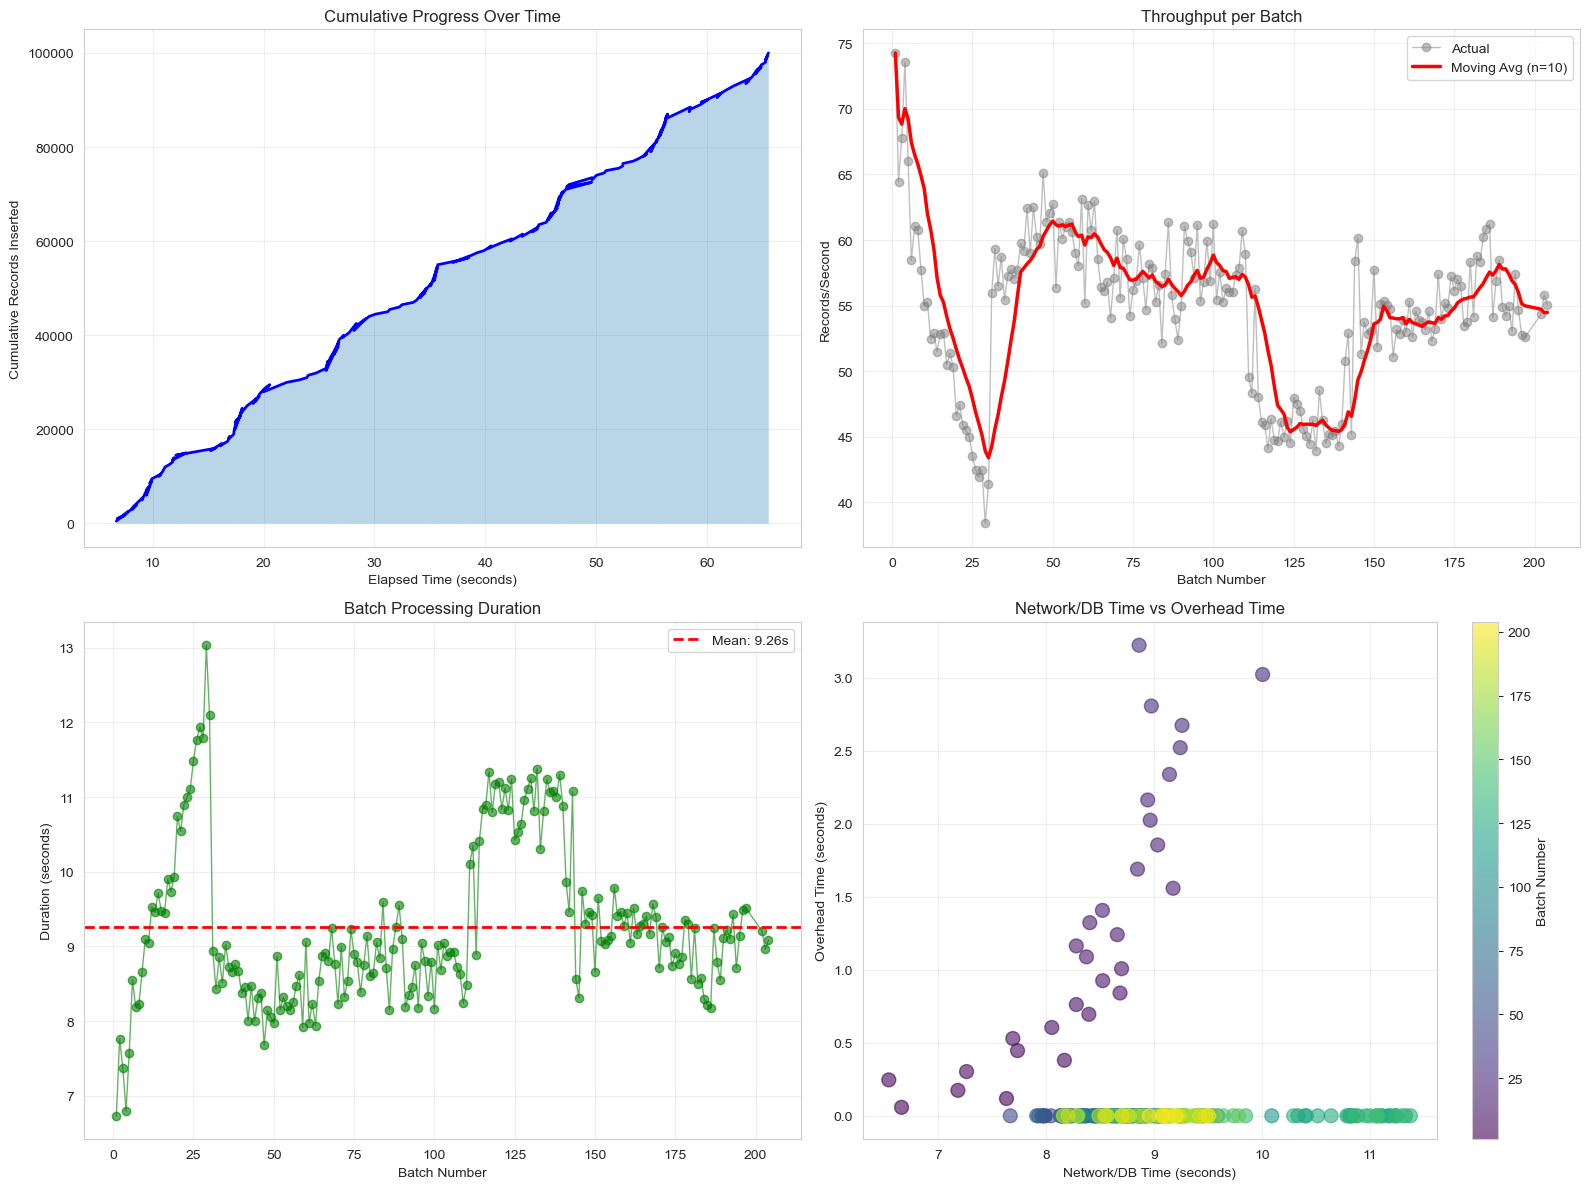


📊 Batch Statistics:
  - Total batches: 200
  - Average batch duration: 9.26s
  - Average batch throughput: 54.65 records/sec
  - Std dev throughput: 5.95 records/sec


In [13]:
# Cell 6: Batch-Level Trend Analysis

# Continue analyzing the same test
print(f"📊 Batch-Level Trends for: {test_id}\n")

# Sort by batch number for time series
stats_df_sorted = stats_df.sort_values('batch_number')

# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Cumulative Records vs Time
ax1 = axes[0, 0]
elapsed_time = (stats_df_sorted['end_time'] - stats_df_sorted['start_time'].min()).dt.total_seconds()
ax1.plot(elapsed_time, stats_df_sorted['cumulative_records'], linewidth=2, color='blue')
ax1.fill_between(elapsed_time, stats_df_sorted['cumulative_records'], alpha=0.3)
ax1.set_xlabel('Elapsed Time (seconds)')
ax1.set_ylabel('Cumulative Records Inserted')
ax1.set_title('Cumulative Progress Over Time')
ax1.grid(True, alpha=0.3)
ax1.ticklabel_format(style='plain', axis='y')

# Plot 2: Throughput per Batch (with moving average)
ax2 = axes[0, 1]
ax2.plot(stats_df_sorted['batch_number'], stats_df_sorted['records_per_second'], 
         marker='o', linewidth=1, alpha=0.5, label='Actual', color='gray')
# Calculate moving average (window=10)
window_size = min(10, len(stats_df_sorted))
if window_size > 1:
    moving_avg = stats_df_sorted['records_per_second'].rolling(window=window_size, min_periods=1).mean()
    ax2.plot(stats_df_sorted['batch_number'], moving_avg, 
             linewidth=2.5, label=f'Moving Avg (n={window_size})', color='red')
ax2.set_xlabel('Batch Number')
ax2.set_ylabel('Records/Second')
ax2.set_title('Throughput per Batch')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: Batch Duration Over Time
ax3 = axes[1, 0]
ax3.plot(stats_df_sorted['batch_number'], stats_df_sorted['total_duration_seconds'], 
         marker='o', linewidth=1, alpha=0.6, color='green')
ax3.set_xlabel('Batch Number')
ax3.set_ylabel('Duration (seconds)')
ax3.set_title('Batch Processing Duration')
ax3.grid(True, alpha=0.3)

# Add horizontal line for mean duration
mean_duration = stats_df_sorted['total_duration_seconds'].mean()
ax3.axhline(y=mean_duration, color='red', linestyle='--', linewidth=2, 
            label=f'Mean: {mean_duration:.2f}s')
ax3.legend()

# Plot 4: Network/DB Time vs Overhead Time
ax4 = axes[1, 1]
ax4.scatter(stats_df_sorted['network_db_time'], stats_df_sorted['overhead_time'], 
            c=stats_df_sorted['batch_number'], cmap='viridis', s=100, alpha=0.6)
ax4.set_xlabel('Network/DB Time (seconds)')
ax4.set_ylabel('Overhead Time (seconds)')
ax4.set_title('Network/DB Time vs Overhead Time')
ax4.grid(True, alpha=0.3)
cbar = plt.colorbar(ax4.collections[0], ax=ax4)
cbar.set_label('Batch Number')

plt.tight_layout()
plt.show()

# Print summary statistics
print("\n📊 Batch Statistics:")
print(f"  - Total batches: {len(stats_df)}")
print(f"  - Average batch duration: {stats_df['total_duration_seconds'].mean():.2f}s")
print(f"  - Average batch throughput: {stats_df['records_per_second'].mean():.2f} records/sec")
print(f"  - Std dev throughput: {stats_df['records_per_second'].std():.2f} records/sec")

🔍 Multi-Test Comparison

Selected tests for comparison:
                               test_id instance_type  batch_size  num_connections  average_records_per_second
20251020_140502_GCP_db-2-3_75_b500_c30     db-2-3_75         500               30                 1327.535767
20251020_144230_GCP_db-2-3_75_b500_c50     db-2-3_75         500               50                 1248.324003
20251020_140333_GCP_db-2-3_75_b500_c20     db-2-3_75         500               20                 1227.958092
   20251016_155215_GCP_db-1-0_6_b10_c1      db-1-0_6          10                1                   44.312705
  20251020_111259_GCP_db-2-3_75_b10_c1     db-2-3_75          10                1                   46.917932

✅ Loaded stats for 5 tests


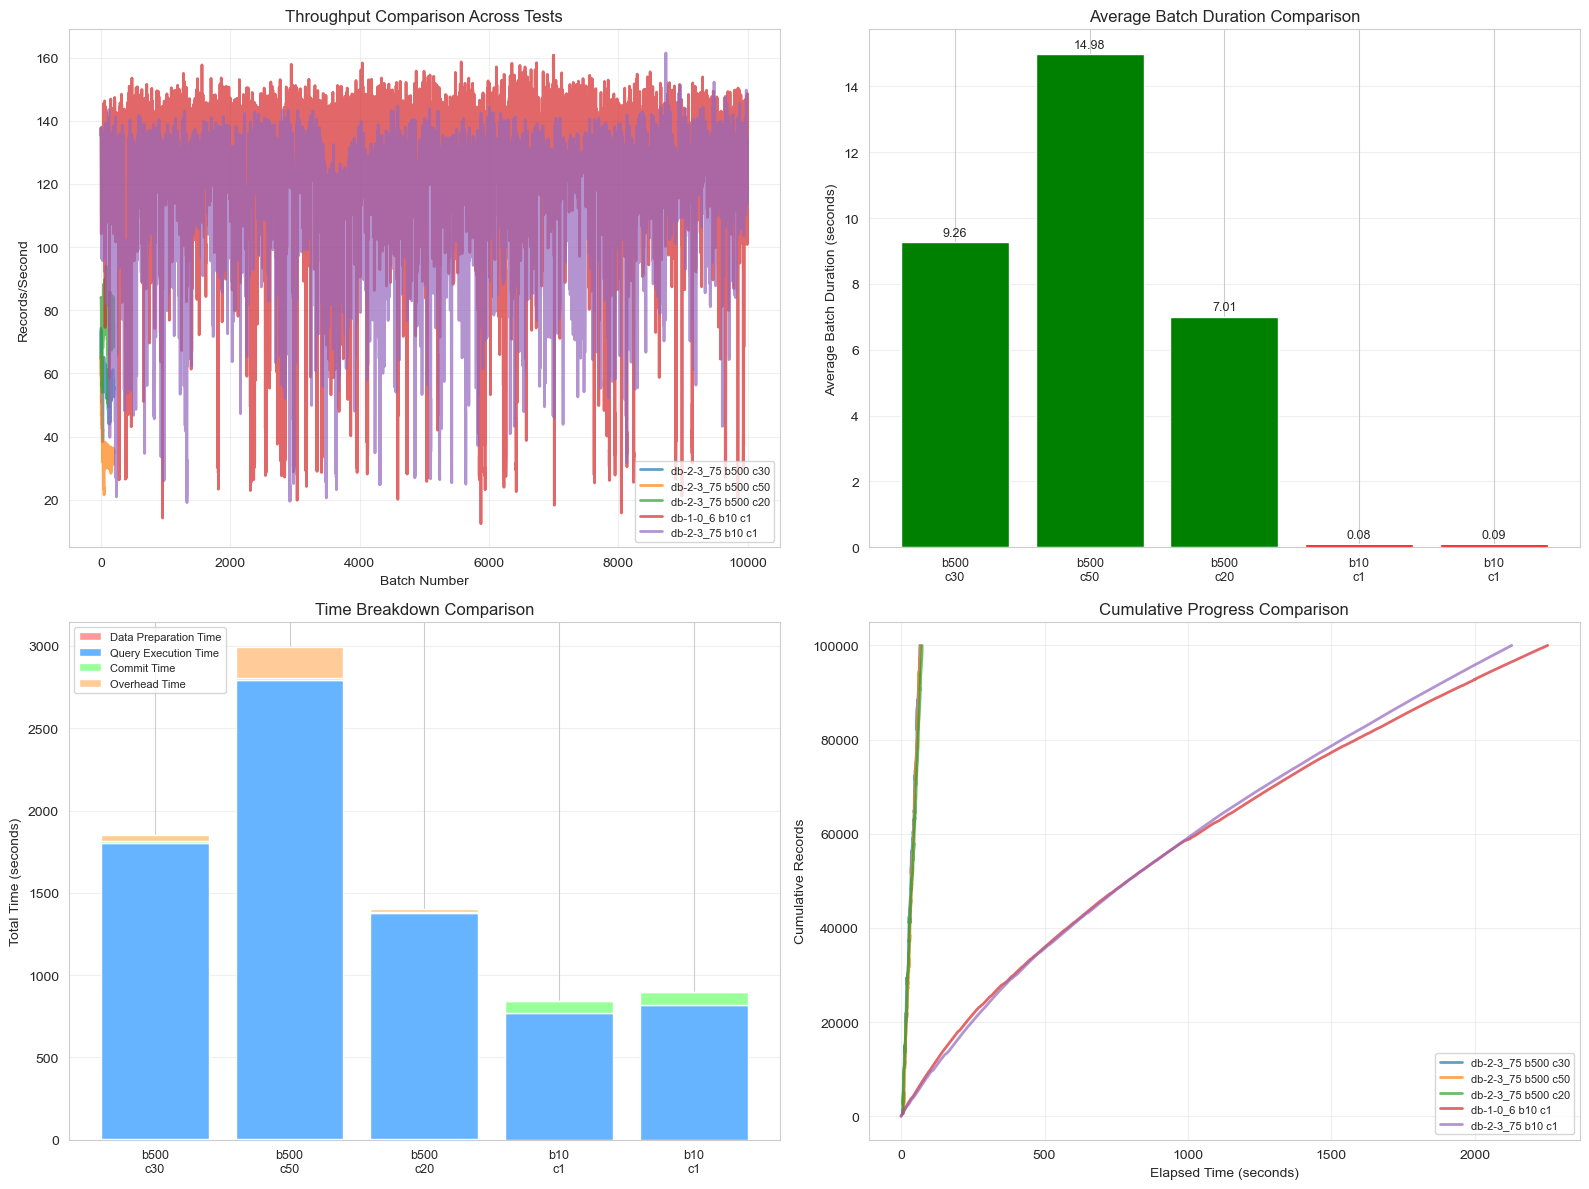


✅ Multi-test comparison complete!


In [14]:
# Cell 7: Multi-Test Comparison

# Select tests to compare (e.g., top 3 and bottom 2 for contrast)
print("🔍 Multi-Test Comparison\n")

# Get top 3 and bottom 2 performers
top_3 = completed_df.nlargest(3, 'average_records_per_second')
bottom_2 = completed_df.nsmallest(2, 'average_records_per_second')
comparison_tests = pd.concat([top_3, bottom_2])

print("Selected tests for comparison:")
print(comparison_tests[['test_id', 'instance_type', 'batch_size', 'num_connections', 'average_records_per_second']].to_string(index=False))

# Load stats for all comparison tests
all_stats = {}
for idx, row in comparison_tests.iterrows():
    tid = row['test_id']
    try:
        all_stats[tid] = load_test_stats(tid)
    except Exception as e:
        print(f"⚠️  Could not load stats for {tid}: {e}")

print(f"\n✅ Loaded stats for {len(all_stats)} tests")

# Create comparison visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Throughput comparison over batches (overlay)
ax1 = axes[0, 0]
for tid, stats in all_stats.items():
    stats_sorted = stats.sort_values('batch_number')
    test_info = comparison_tests[comparison_tests['test_id'] == tid].iloc[0]
    label = f"{test_info['instance_type']} b{test_info['batch_size']} c{test_info['num_connections']}"
    ax1.plot(stats_sorted['batch_number'], stats_sorted['records_per_second'], 
             label=label, alpha=0.7, linewidth=2)
ax1.set_xlabel('Batch Number')
ax1.set_ylabel('Records/Second')
ax1.set_title('Throughput Comparison Across Tests')
ax1.legend(fontsize=8)
ax1.grid(True, alpha=0.3)

# Plot 2: Average duration comparison (bar chart)
ax2 = axes[0, 1]
avg_durations = []
test_labels = []
for tid, stats in all_stats.items():
    avg_durations.append(stats['total_duration_seconds'].mean())
    test_info = comparison_tests[comparison_tests['test_id'] == tid].iloc[0]
    test_labels.append(f"b{test_info['batch_size']}\nc{test_info['num_connections']}")

bars = ax2.bar(range(len(avg_durations)), avg_durations, color=['green', 'green', 'green', 'red', 'red'])
ax2.set_xticks(range(len(test_labels)))
ax2.set_xticklabels(test_labels, fontsize=9)
ax2.set_ylabel('Average Batch Duration (seconds)')
ax2.set_title('Average Batch Duration Comparison')
ax2.grid(True, alpha=0.3, axis='y')

# Add value labels
for i, v in enumerate(avg_durations):
    ax2.text(i, v + 0.1, f'{v:.2f}', ha='center', va='bottom', fontsize=9)

# Plot 3: Time breakdown comparison (stacked bar)
ax3 = axes[1, 0]
time_components = ['data_preparation_time', 'query_execution_time', 'commit_time', 'overhead_time']
time_data = []
for tid in all_stats.keys():
    totals = all_stats[tid][time_components].sum()
    time_data.append(totals.values)

time_data = np.array(time_data)
x_pos = np.arange(len(all_stats))
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']

bottom = np.zeros(len(all_stats))
for i, component in enumerate(time_components):
    ax3.bar(x_pos, time_data[:, i], bottom=bottom, label=component.replace('_', ' ').title(), 
            color=colors[i])
    bottom += time_data[:, i]

ax3.set_xticks(x_pos)
ax3.set_xticklabels(test_labels, fontsize=9)
ax3.set_ylabel('Total Time (seconds)')
ax3.set_title('Time Breakdown Comparison')
ax3.legend(fontsize=8, loc='upper left')
ax3.grid(True, alpha=0.3, axis='y')

# Plot 4: Cumulative records comparison
ax4 = axes[1, 1]
for tid, stats in all_stats.items():
    stats_sorted = stats.sort_values('batch_number')
    elapsed_time = (stats_sorted['end_time'] - stats_sorted['start_time'].min()).dt.total_seconds()
    test_info = comparison_tests[comparison_tests['test_id'] == tid].iloc[0]
    label = f"{test_info['instance_type']} b{test_info['batch_size']} c{test_info['num_connections']}"
    ax4.plot(elapsed_time, stats_sorted['cumulative_records'], 
             label=label, alpha=0.7, linewidth=2)

ax4.set_xlabel('Elapsed Time (seconds)')
ax4.set_ylabel('Cumulative Records')
ax4.set_title('Cumulative Progress Comparison')
ax4.legend(fontsize=8)
ax4.grid(True, alpha=0.3)
ax4.ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.show()

print("\n✅ Multi-test comparison complete!")

📊 INSTANCE-SPECIFIC PERFORMANCE ANALYSIS

🔍 Found 3 instance types: db-1-0_6, db-1-1_7, db-2-3_75


📊 Instance Type: db-1-0_6
  Total tests: 5

  🏆 Optimal Configuration:
      Batch Size: 100
      Connections: 10
      Throughput: 109.93 records/sec


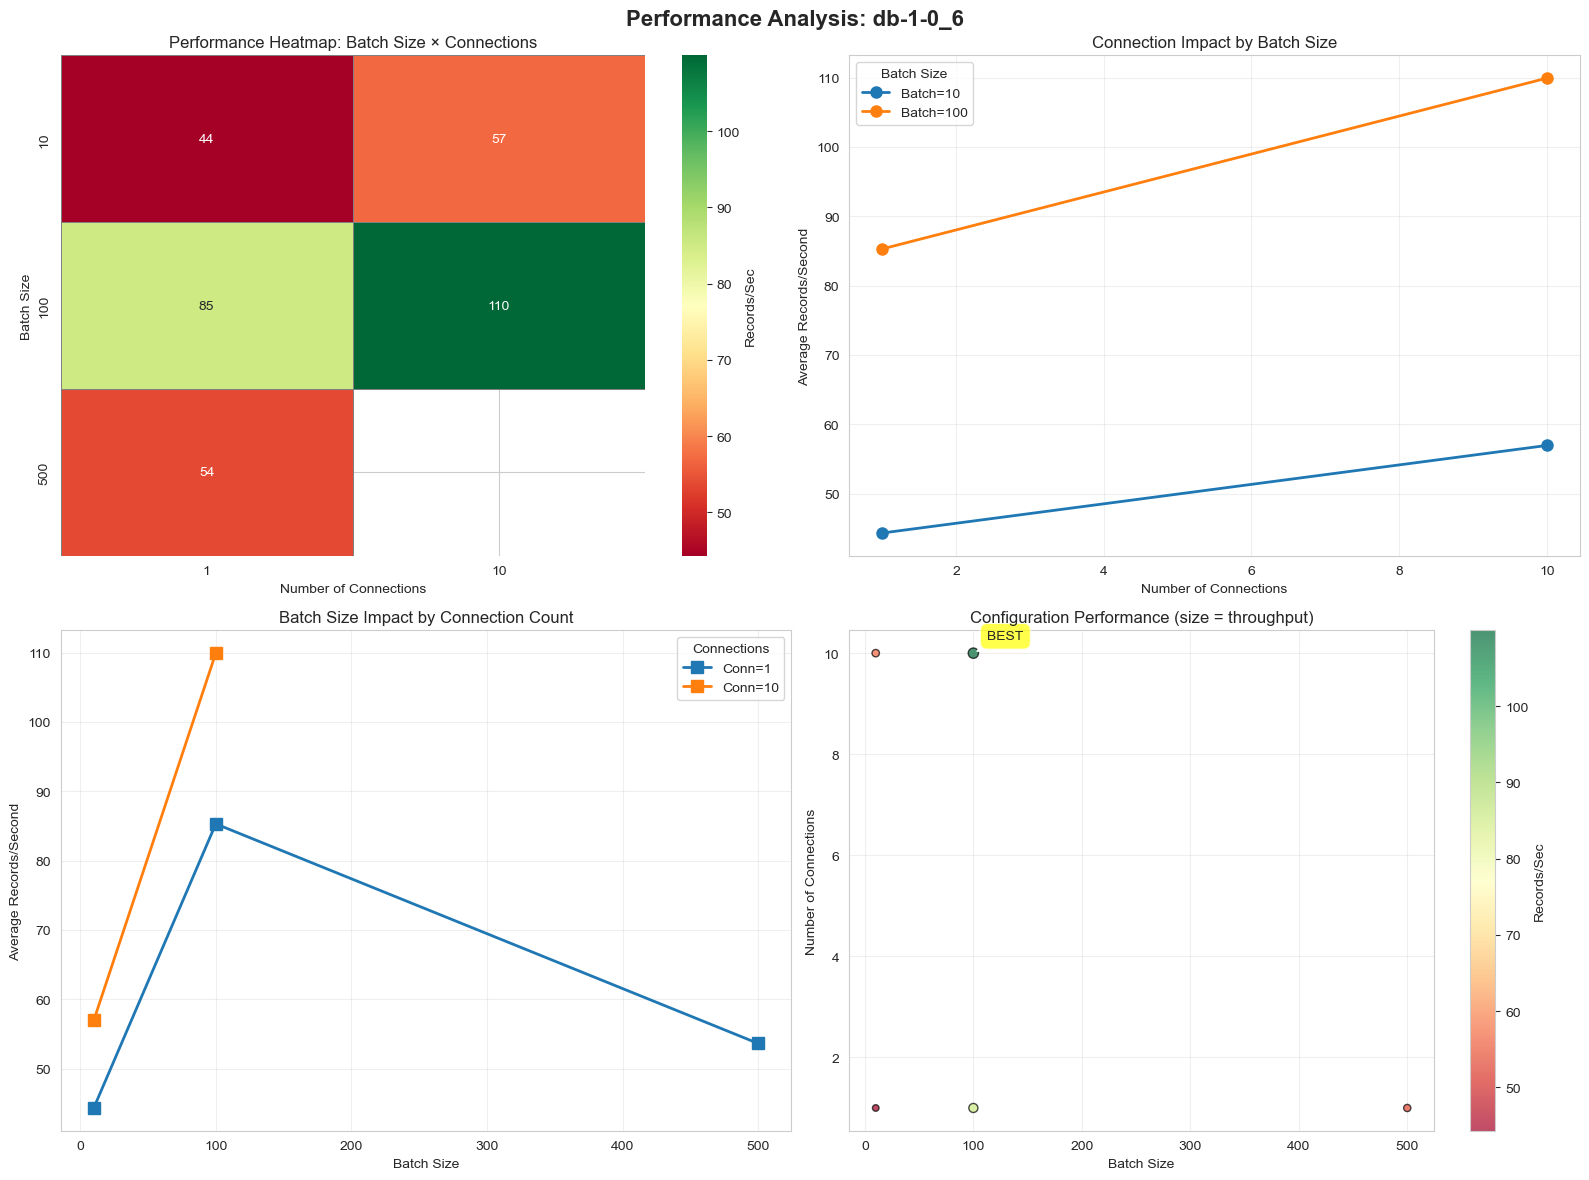


  📈 Performance Statistics:
      Min: 44.31 records/sec
      Max: 109.93 records/sec
      Mean: 70.02 records/sec
      Std Dev: 27.05 records/sec

  📊 Performance Variation:
      Improvement from worst to best: 148.1%

📊 Instance Type: db-1-1_7
  Total tests: 12

  🏆 Optimal Configuration:
      Batch Size: 100
      Connections: 10
      Throughput: 882.23 records/sec


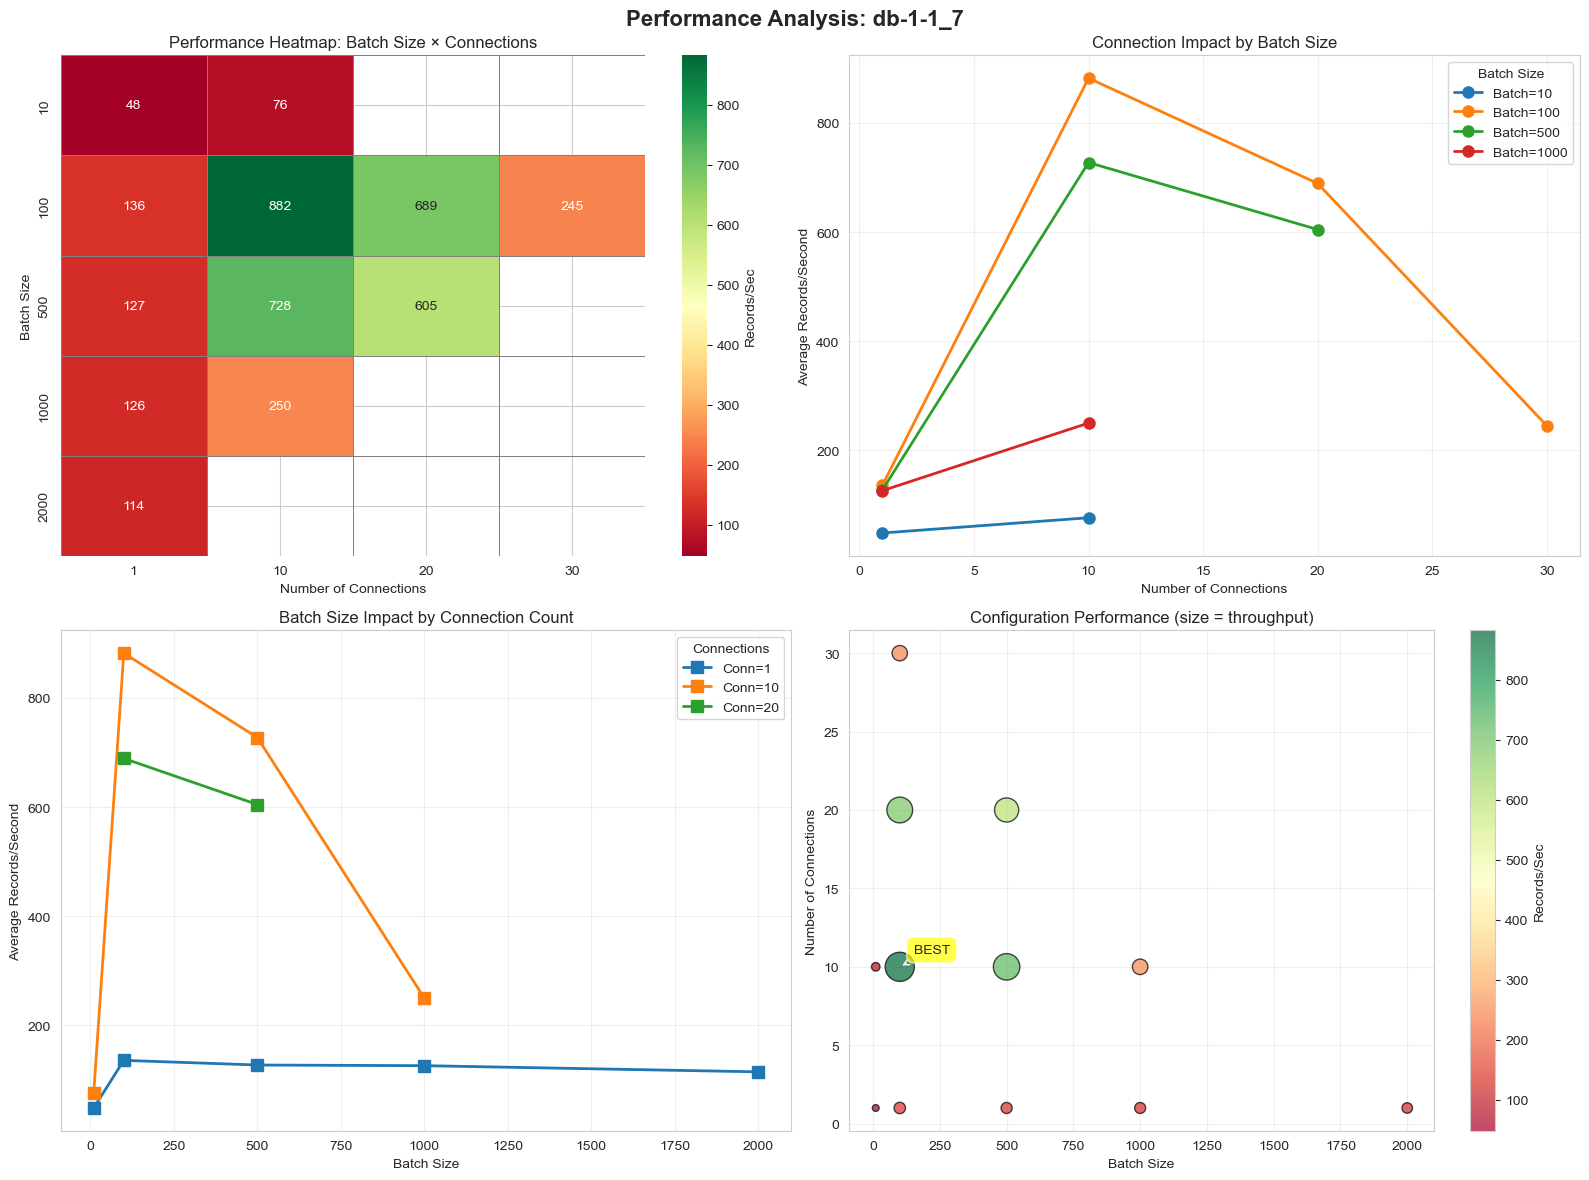


  📈 Performance Statistics:
      Min: 48.18 records/sec
      Max: 882.23 records/sec
      Mean: 335.44 records/sec
      Std Dev: 300.28 records/sec

  📊 Performance Variation:
      Improvement from worst to best: 1731.0%

📊 Instance Type: db-2-3_75
  Total tests: 21

  🏆 Optimal Configuration:
      Batch Size: 500
      Connections: 30
      Throughput: 1327.54 records/sec


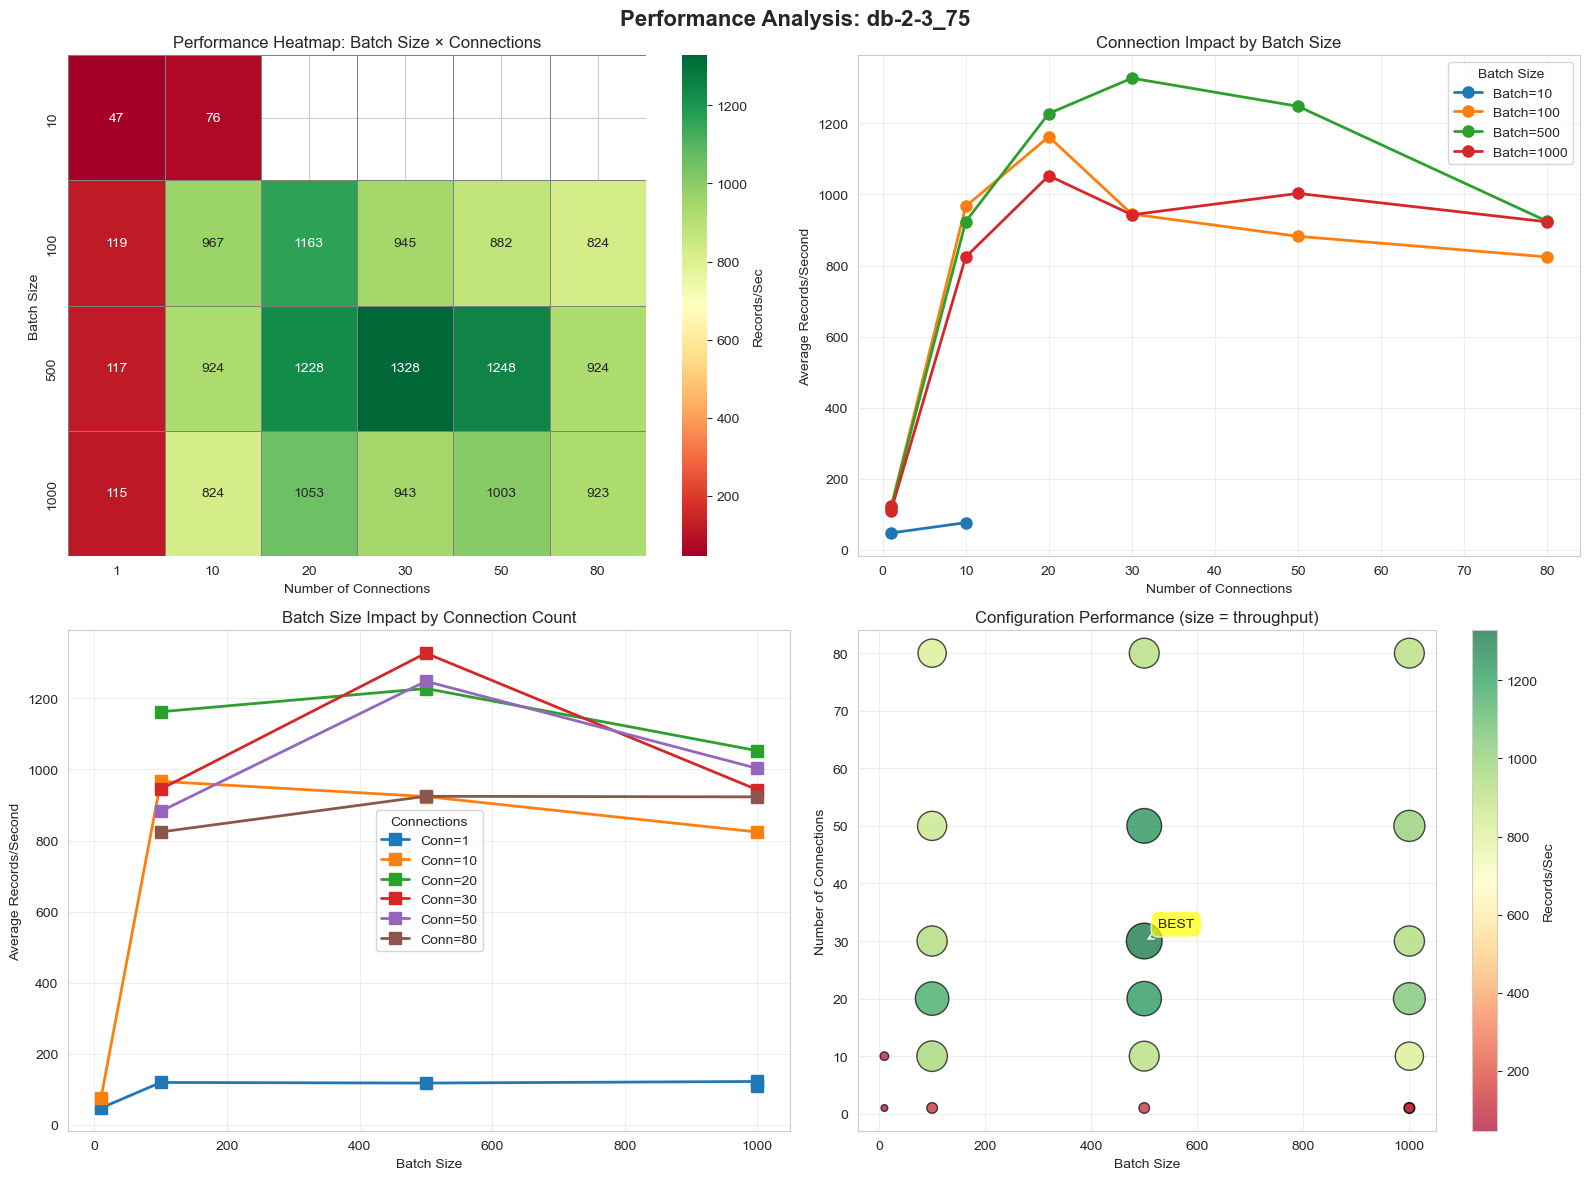


  📈 Performance Statistics:
      Min: 46.92 records/sec
      Max: 1327.54 records/sec
      Mean: 750.80 records/sec
      Std Dev: 443.36 records/sec

  📊 Performance Variation:
      Improvement from worst to best: 2729.5%

✅ Instance-specific analysis complete!


In [15]:
# Cell 8: Instance-Specific Performance Analysis (Batch Size × Connection Count)

print("=" * 80)
print("📊 INSTANCE-SPECIFIC PERFORMANCE ANALYSIS")
print("=" * 80)

# Get all unique instance types
instance_types = completed_df['instance_type'].unique()
print(f"\n🔍 Found {len(instance_types)} instance types: {', '.join(instance_types)}\n")

# Analyze each instance type
for instance_type in sorted(instance_types):
    print(f"\n{'=' * 80}")
    print(f"📊 Instance Type: {instance_type}")
    print(f"{'=' * 80}")
    
    # Filter data for this instance
    instance_df = completed_df[completed_df['instance_type'] == instance_type].copy()
    
    if len(instance_df) == 0:
        print("  ⚠️  No data available")
        continue
    
    print(f"  Total tests: {len(instance_df)}")
    
    # Create pivot table for heatmap
    perf_pivot = instance_df.pivot_table(
        values='average_records_per_second',
        index='batch_size',
        columns='num_connections',
        aggfunc='mean'
    )
    
    # Create visualizations for this instance
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle(f'Performance Analysis: {instance_type}', fontsize=16, fontweight='bold')
    
    # Plot 1: Heatmap - Batch Size × Connections
    ax1 = axes[0, 0]
    if not perf_pivot.empty:
        sns.heatmap(perf_pivot, annot=True, fmt='.0f', cmap='RdYlGn', ax=ax1, 
                    cbar_kws={'label': 'Records/Sec'}, linewidths=0.5, linecolor='gray')
        ax1.set_xlabel('Number of Connections')
        ax1.set_ylabel('Batch Size')
        ax1.set_title('Performance Heatmap: Batch Size × Connections')
        
        # Find optimal configuration
        max_perf = instance_df['average_records_per_second'].max()
        optimal = instance_df[instance_df['average_records_per_second'] == max_perf].iloc[0]
        print(f"\n  🏆 Optimal Configuration:")
        print(f"      Batch Size: {optimal['batch_size']}")
        print(f"      Connections: {optimal['num_connections']}")
        print(f"      Throughput: {optimal['average_records_per_second']:.2f} records/sec")
    else:
        ax1.text(0.5, 0.5, 'No data', ha='center', va='center')
    
    # Plot 2: Connection Impact (grouped by batch size)
    ax2 = axes[0, 1]
    for batch_size in sorted(instance_df['batch_size'].unique()):
        batch_data = instance_df[instance_df['batch_size'] == batch_size].sort_values('num_connections')
        if len(batch_data) > 1:
            ax2.plot(batch_data['num_connections'], batch_data['average_records_per_second'],
                    marker='o', linewidth=2, label=f'Batch={batch_size}', markersize=8)
    
    ax2.set_xlabel('Number of Connections')
    ax2.set_ylabel('Average Records/Second')
    ax2.set_title('Connection Impact by Batch Size')
    ax2.legend(title='Batch Size')
    ax2.grid(True, alpha=0.3)
    
    # Plot 3: Batch Size Impact (grouped by connections)
    ax3 = axes[1, 0]
    for num_conn in sorted(instance_df['num_connections'].unique()):
        conn_data = instance_df[instance_df['num_connections'] == num_conn].sort_values('batch_size')
        if len(conn_data) > 1:
            ax3.plot(conn_data['batch_size'], conn_data['average_records_per_second'],
                    marker='s', linewidth=2, label=f'Conn={num_conn}', markersize=8)
    
    ax3.set_xlabel('Batch Size')
    ax3.set_ylabel('Average Records/Second')
    ax3.set_title('Batch Size Impact by Connection Count')
    ax3.legend(title='Connections')
    ax3.grid(True, alpha=0.3)
    
    # Plot 4: 3D Surface-like scatter plot
    ax4 = axes[1, 1]
    scatter = ax4.scatter(instance_df['batch_size'], instance_df['num_connections'],
                         c=instance_df['average_records_per_second'], 
                         s=instance_df['average_records_per_second']/2,
                         cmap='RdYlGn', alpha=0.7, edgecolors='black', linewidth=1)
    ax4.set_xlabel('Batch Size')
    ax4.set_ylabel('Number of Connections')
    ax4.set_title('Configuration Performance (size = throughput)')
    cbar = plt.colorbar(scatter, ax=ax4)
    cbar.set_label('Records/Sec')
    ax4.grid(True, alpha=0.3)
    
    # Annotate best point
    if len(instance_df) > 0:
        best = instance_df.loc[instance_df['average_records_per_second'].idxmax()]
        ax4.annotate('BEST', xy=(best['batch_size'], best['num_connections']),
                    xytext=(10, 10), textcoords='offset points',
                    bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.7),
                    arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))
    
    plt.tight_layout()
    plt.show()
    
    # Print detailed statistics
    print(f"\n  📈 Performance Statistics:")
    print(f"      Min: {instance_df['average_records_per_second'].min():.2f} records/sec")
    print(f"      Max: {instance_df['average_records_per_second'].max():.2f} records/sec")
    print(f"      Mean: {instance_df['average_records_per_second'].mean():.2f} records/sec")
    print(f"      Std Dev: {instance_df['average_records_per_second'].std():.2f} records/sec")
    
    # Performance improvement analysis
    min_perf = instance_df['average_records_per_second'].min()
    max_perf = instance_df['average_records_per_second'].max()
    improvement = ((max_perf - min_perf) / min_perf) * 100
    print(f"\n  📊 Performance Variation:")
    print(f"      Improvement from worst to best: {improvement:.1f}%")

print("\n" + "=" * 80)
print("✅ Instance-specific analysis complete!")
print("=" * 80)

🔍 CROSS-INSTANCE COMPARISON SUMMARY

📊 OPTIMAL CONFIGURATIONS BY INSTANCE TYPE:
--------------------------------------------------------------------------------

🖥️  db-1-0_6
   Tests conducted: 5
   🏆 Best config: Batch=100, Connections=10
      → Throughput: 109.93 records/sec
   ⚠️  Worst config: Batch=10, Connections=1
      → Throughput: 44.31 records/sec
   📈 Improvement: 148.1%

🖥️  db-1-1_7
   Tests conducted: 12
   🏆 Best config: Batch=100, Connections=10
      → Throughput: 882.23 records/sec
   ⚠️  Worst config: Batch=10, Connections=1
      → Throughput: 48.18 records/sec
   📈 Improvement: 1731.0%

🖥️  db-2-3_75
   Tests conducted: 21
   🏆 Best config: Batch=500, Connections=30
      → Throughput: 1327.54 records/sec
   ⚠️  Worst config: Batch=10, Connections=1
      → Throughput: 46.92 records/sec
   📈 Improvement: 2729.5%


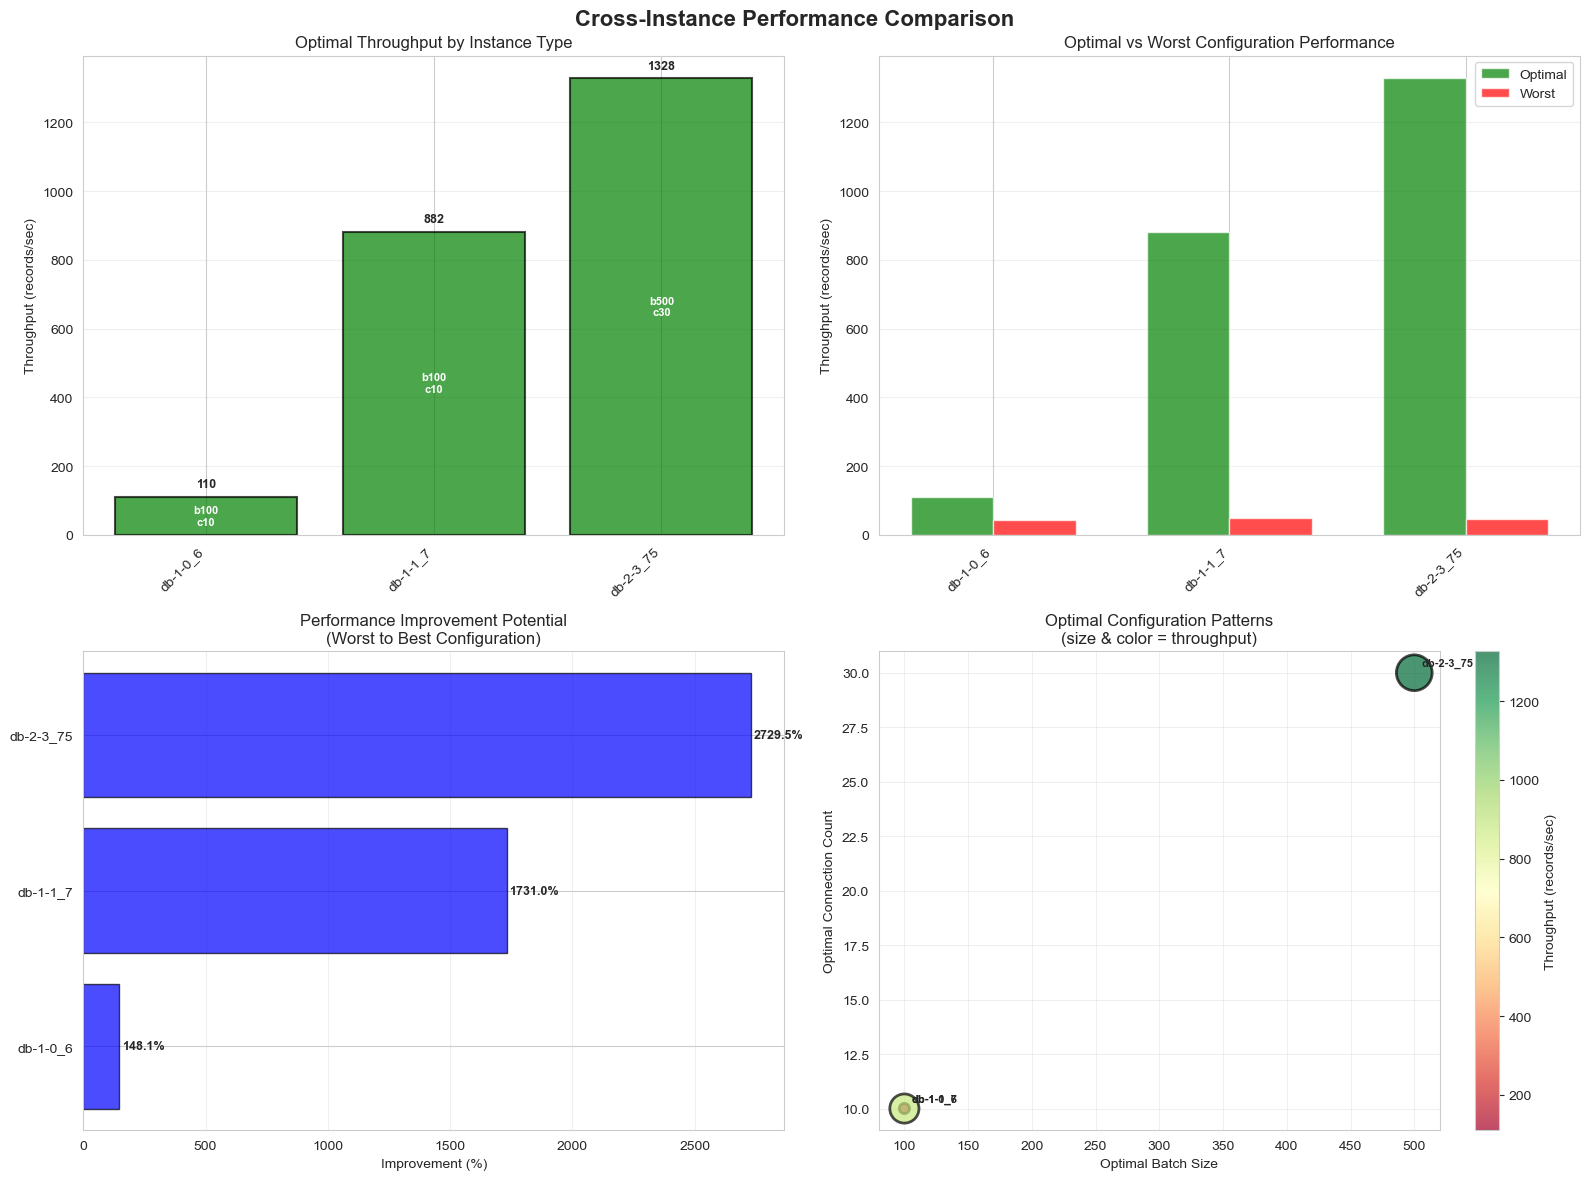


💡 RECOMMENDATIONS

🏆 Best Overall Performance:
   Instance: db-2-3_75
   Configuration: Batch=500, Connections=30
   Throughput: 1327.54 records/sec

🎯 Most Stable Performance (least sensitive to config):
   Instance: db-1-0_6
   Performance variation: 148.1%



In [16]:
# Cell 9: Cross-Instance Comparison Summary

print("=" * 80)
print("🔍 CROSS-INSTANCE COMPARISON SUMMARY")
print("=" * 80)

# Collect optimal configurations for each instance type
summary_data = []

for instance_type in sorted(completed_df['instance_type'].unique()):
    instance_df = completed_df[completed_df['instance_type'] == instance_type]
    
    if len(instance_df) == 0:
        continue
    
    # Find optimal configuration
    optimal = instance_df.loc[instance_df['average_records_per_second'].idxmax()]
    
    # Find worst configuration
    worst = instance_df.loc[instance_df['average_records_per_second'].idxmin()]
    
    summary_data.append({
        'instance_type': instance_type,
        'optimal_batch': optimal['batch_size'],
        'optimal_conn': optimal['num_connections'],
        'optimal_throughput': optimal['average_records_per_second'],
        'worst_batch': worst['batch_size'],
        'worst_conn': worst['num_connections'],
        'worst_throughput': worst['average_records_per_second'],
        'num_tests': len(instance_df),
        'avg_throughput': instance_df['average_records_per_second'].mean(),
        'improvement_pct': ((optimal['average_records_per_second'] - worst['average_records_per_second']) / 
                           worst['average_records_per_second'] * 100)
    })

summary_df = pd.DataFrame(summary_data)

# Display summary table
print("\n📊 OPTIMAL CONFIGURATIONS BY INSTANCE TYPE:")
print("-" * 80)
for _, row in summary_df.iterrows():
    print(f"\n🖥️  {row['instance_type']}")
    print(f"   Tests conducted: {row['num_tests']}")
    print(f"   🏆 Best config: Batch={row['optimal_batch']}, Connections={row['optimal_conn']}")
    print(f"      → Throughput: {row['optimal_throughput']:.2f} records/sec")
    print(f"   ⚠️  Worst config: Batch={row['worst_batch']}, Connections={row['worst_conn']}")
    print(f"      → Throughput: {row['worst_throughput']:.2f} records/sec")
    print(f"   📈 Improvement: {row['improvement_pct']:.1f}%")

# Create comparison visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Cross-Instance Performance Comparison', fontsize=16, fontweight='bold')

# Plot 1: Optimal throughput by instance
ax1 = axes[0, 0]
bars = ax1.bar(range(len(summary_df)), summary_df['optimal_throughput'], 
               color='green', alpha=0.7, edgecolor='black', linewidth=1.5)
ax1.set_xticks(range(len(summary_df)))
ax1.set_xticklabels(summary_df['instance_type'], rotation=45, ha='right')
ax1.set_ylabel('Throughput (records/sec)')
ax1.set_title('Optimal Throughput by Instance Type')
ax1.grid(True, alpha=0.3, axis='y')

# Add value labels
for i, (idx, row) in enumerate(summary_df.iterrows()):
    ax1.text(i, row['optimal_throughput'] + 20, f"{row['optimal_throughput']:.0f}", 
            ha='center', va='bottom', fontsize=9, fontweight='bold')
    ax1.text(i, row['optimal_throughput'] / 2, 
            f"b{row['optimal_batch']}\nc{row['optimal_conn']}", 
            ha='center', va='center', fontsize=8, color='white', fontweight='bold')

# Plot 2: Optimal vs Worst performance
ax2 = axes[0, 1]
x = np.arange(len(summary_df))
width = 0.35
bars1 = ax2.bar(x - width/2, summary_df['optimal_throughput'], width, 
                label='Optimal', color='green', alpha=0.7)
bars2 = ax2.bar(x + width/2, summary_df['worst_throughput'], width, 
                label='Worst', color='red', alpha=0.7)
ax2.set_xticks(x)
ax2.set_xticklabels(summary_df['instance_type'], rotation=45, ha='right')
ax2.set_ylabel('Throughput (records/sec)')
ax2.set_title('Optimal vs Worst Configuration Performance')
ax2.legend()
ax2.grid(True, alpha=0.3, axis='y')

# Plot 3: Performance improvement potential
ax3 = axes[1, 0]
bars = ax3.barh(range(len(summary_df)), summary_df['improvement_pct'], 
                color='blue', alpha=0.7, edgecolor='black')
ax3.set_yticks(range(len(summary_df)))
ax3.set_yticklabels(summary_df['instance_type'])
ax3.set_xlabel('Improvement (%)')
ax3.set_title('Performance Improvement Potential\n(Worst to Best Configuration)')
ax3.grid(True, alpha=0.3, axis='x')

# Add value labels
for i, v in enumerate(summary_df['improvement_pct']):
    ax3.text(v + 10, i, f'{v:.1f}%', va='center', fontsize=9, fontweight='bold')

# Plot 4: Optimal configuration patterns (batch vs connections)
ax4 = axes[1, 1]
scatter = ax4.scatter(summary_df['optimal_batch'], summary_df['optimal_conn'],
                     s=summary_df['optimal_throughput']/2, 
                     c=summary_df['optimal_throughput'],
                     cmap='RdYlGn', alpha=0.7, edgecolors='black', linewidth=2)
ax4.set_xlabel('Optimal Batch Size')
ax4.set_ylabel('Optimal Connection Count')
ax4.set_title('Optimal Configuration Patterns\n(size & color = throughput)')
ax4.grid(True, alpha=0.3)

# Annotate each point with instance name
for _, row in summary_df.iterrows():
    ax4.annotate(row['instance_type'], 
                xy=(row['optimal_batch'], row['optimal_conn']),
                xytext=(5, 5), textcoords='offset points',
                fontsize=8, fontweight='bold')

cbar = plt.colorbar(scatter, ax=ax4)
cbar.set_label('Throughput (records/sec)')

plt.tight_layout()
plt.show()

# Overall recommendation
print("\n" + "=" * 80)
print("💡 RECOMMENDATIONS")
print("=" * 80)

best_overall = summary_df.loc[summary_df['optimal_throughput'].idxmax()]
print(f"\n🏆 Best Overall Performance:")
print(f"   Instance: {best_overall['instance_type']}")
print(f"   Configuration: Batch={best_overall['optimal_batch']}, Connections={best_overall['optimal_conn']}")
print(f"   Throughput: {best_overall['optimal_throughput']:.2f} records/sec")

most_stable = summary_df.loc[summary_df['improvement_pct'].idxmin()]
print(f"\n🎯 Most Stable Performance (least sensitive to config):")
print(f"   Instance: {most_stable['instance_type']}")
print(f"   Performance variation: {most_stable['improvement_pct']:.1f}%")

print("\n" + "=" * 80)